In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import numpy as np
import pandas as pd
import pickle
#import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
save_dir='model_storage/'
compare = ['MLP', 'GCN', 'GAT', 'SAGE', 'HeteroGNN', 'HGT']

In [4]:
curves = {}
for model in compare:
    if model == 'GCN':
        now_dir = save_dir + model + '/' + model +'_knn_feature/best_config.p'
    elif model == 'HeteroGNN':
        now_dir = save_dir + model + '/' + 'Hetero_best_model/best_config.p'
    else:
        now_dir = save_dir + model + '/' + model +'_best_model/best_config.p'
    with open(now_dir, 'rb') as fp:
        train_state = pickle.load(fp)
    states = pd.DataFrame(train_state['val_VAL_acc_1'], columns=['val_VAL_1'])
    states['train_VAL_1'] = pd.DataFrame(train_state['train_VAL_acc_1'])
    states['val_VAL'] = pd.DataFrame(train_state['val_VAL_acc'])
    states['train_VAL'] = pd.DataFrame(train_state['train_VAL_acc'])
    states['val_VAL_jac'] = pd.DataFrame(train_state['val_VAL_jac'])*100
    states['train_VAL_jac'] = pd.DataFrame(train_state['train_VAL_jac'])*100
    states['val_ATT'] = pd.DataFrame(train_state['val_ATT_acc'])
    states['train_ATT'] = pd.DataFrame(train_state['train_ATT_acc'])
    
    curves[model] = np.array(states)

In [5]:
[curves[model].shape for model in compare]

[(126, 8), (207, 8), (442, 8), (170, 8), (300, 8), (300, 8)]

In [7]:
model_names = ['MLP', 'GCN-kNN', 'GAT', 'GSA', 'HGSA', 'HGT']
metric_names = ['OUV Top-1\n Accuracy', 'OUV Top-3\n Accuracy', 'OUV Order-3\n Jaccard Index', 'HA Top-1\n Accuracy']

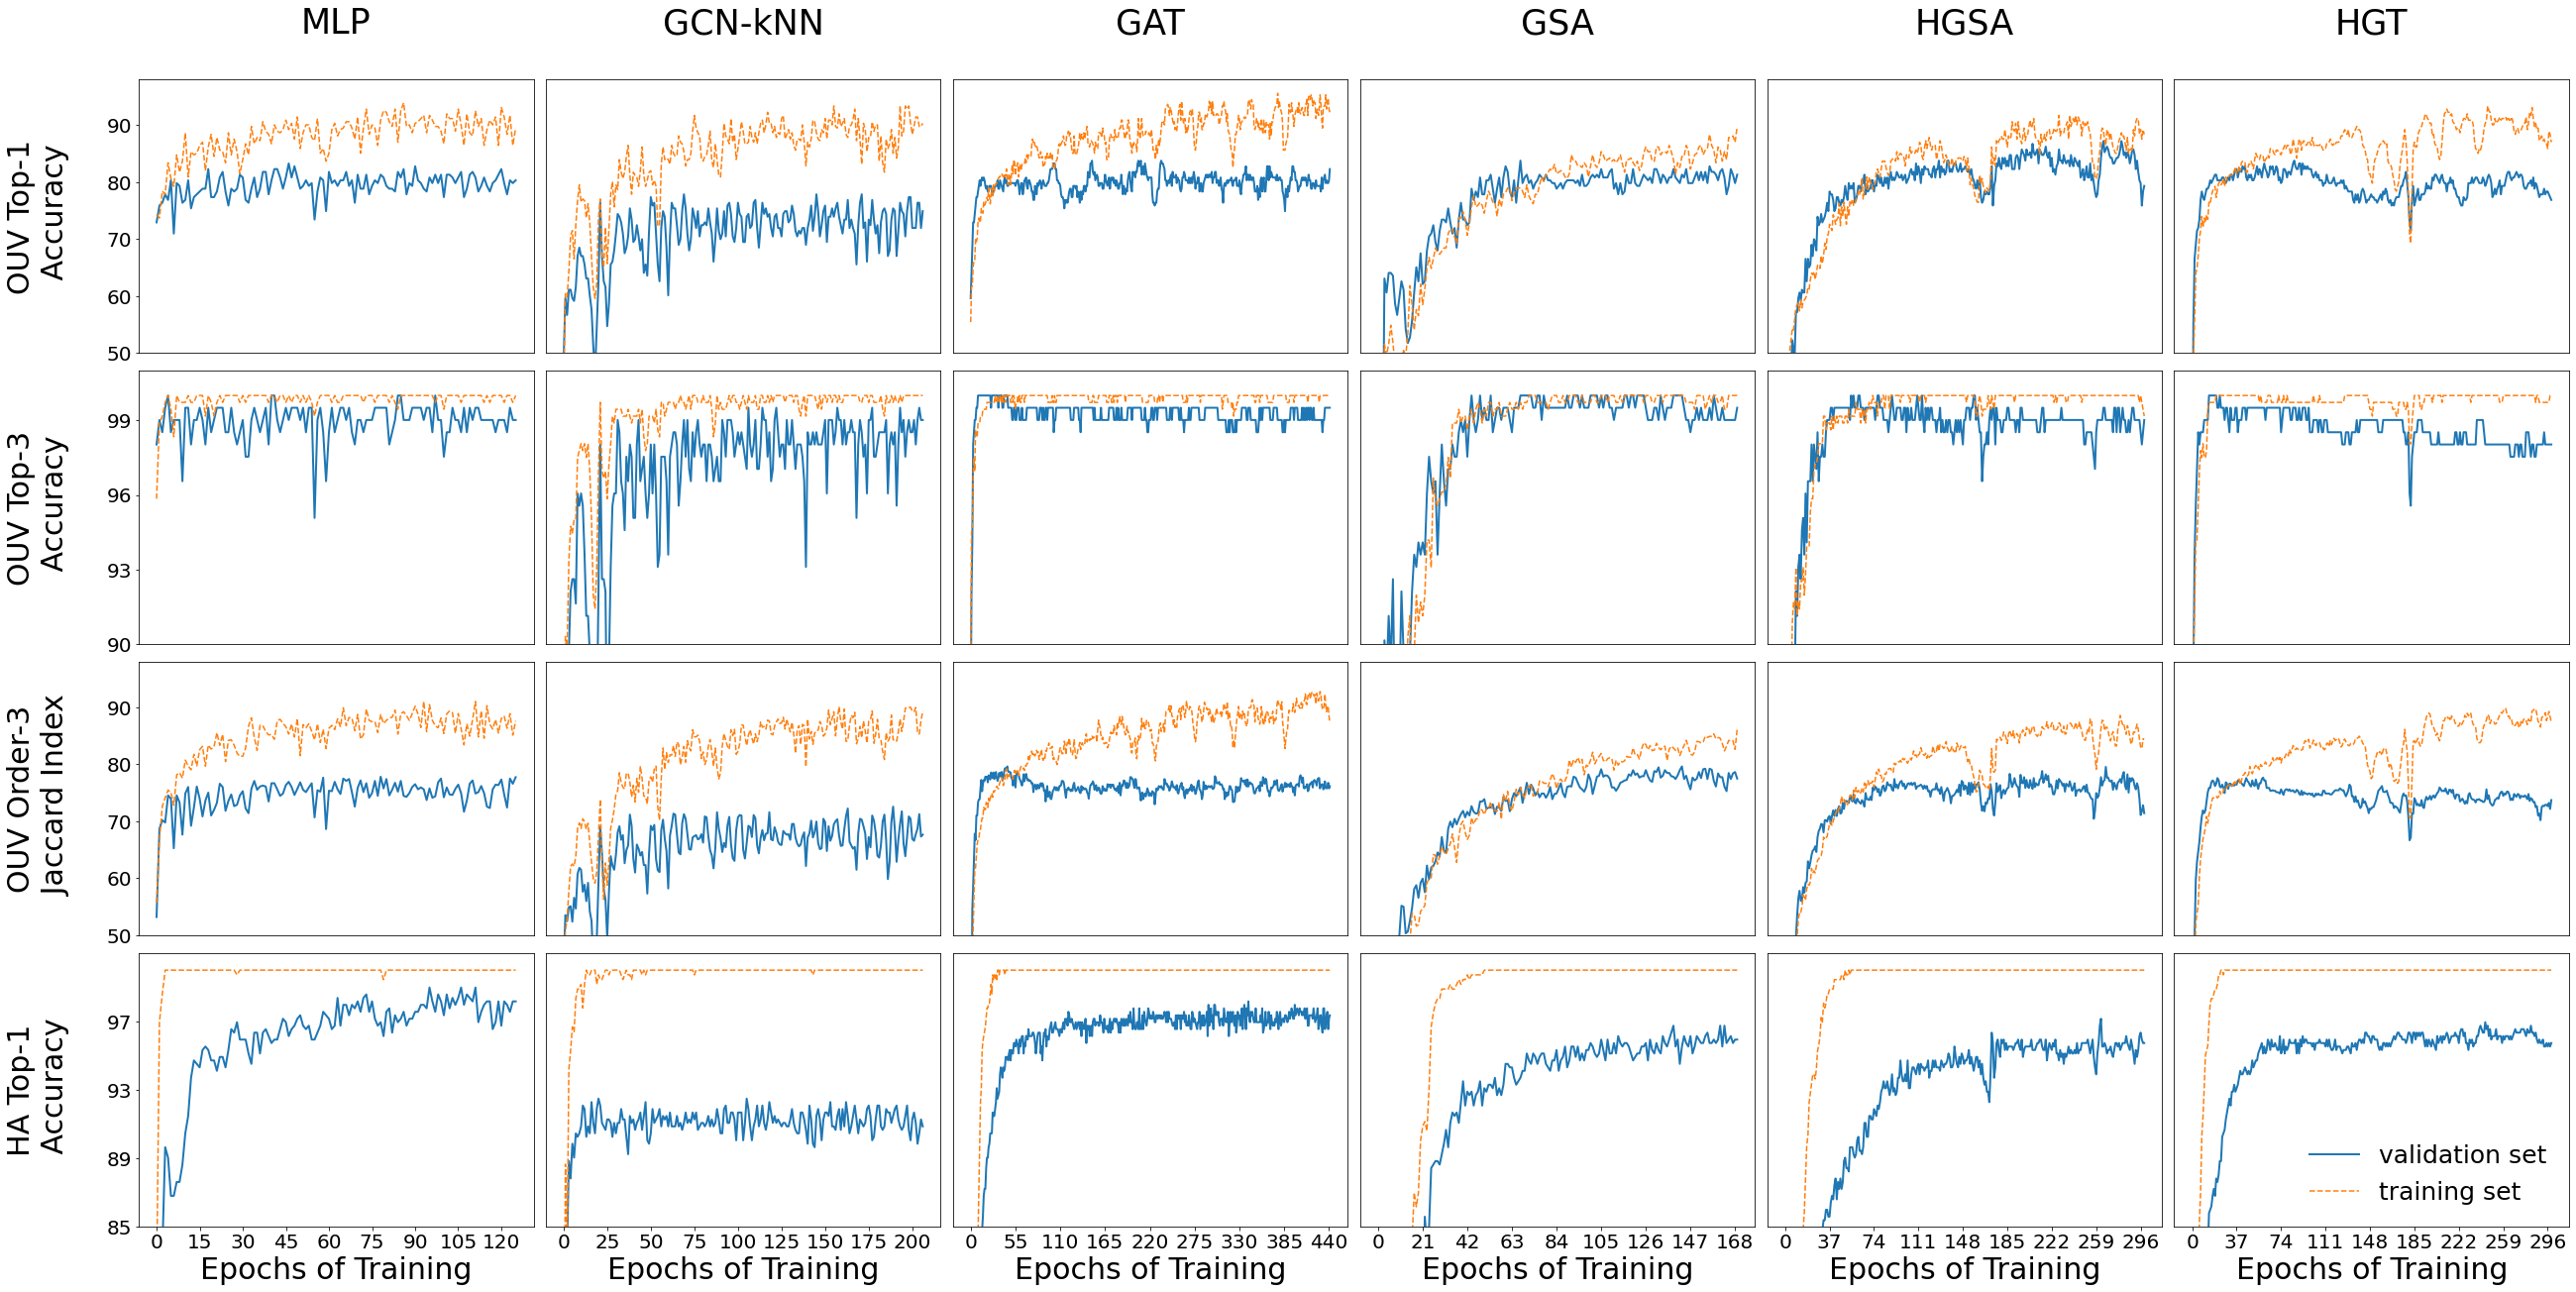

In [8]:
#sns.set(style="white")

fig, axs = plt.subplots(nrows=4, ncols=6, figsize = (36,18), constrained_layout=True,
                       sharex=False, sharey=False)
for i in range(len(compare)):
    model = compare[i]
    model_name = model_names[i]
    for j in range(len(metric_names)):
        metric_name = metric_names[j]
        x = np.arange(curves[model].shape[0])
        y1 = curves[model][:,2*j]
        y2 = curves[model][:,2*j+1]
        axs[j,i].plot(x, y1, label = 'validation set', lw=2)
        axs[j,i].plot(x, y2, label = 'training set', ls = '--', lw=1.5)
        if j==0:
            axs[j,i].set_ylim(50,98)
            axs[j,i].set_title(model_name+'\n',size=35)
        elif j==1:
            axs[j,i].set_ylim(90,101)
        elif j==2:
            axs[j,i].set_ylim(50,98)
        else:
            axs[j,i].set_ylim(85,101)
        
        if i>0:
            axs[j,i].set_yticks([])
        else:
            if j==0:
                axs[j,i].set_yticks(np.arange(50,101, 10), fontsize=20)
                axs[j,i].set_yticklabels(np.arange(50,101, 10), fontsize=20)
                axs[j,i].set_ylim(50,98)
            elif j==1:
                axs[j,i].set_yticks(np.arange(90,101, 3), fontsize=20)
                axs[j,i].set_yticklabels(np.arange(90,101, 3), fontsize=20)
                axs[j,i].set_ylim(90,101)
            elif j==2:
                axs[j,i].set_yticks(np.arange(50,101, 10), fontsize=20)
                axs[j,i].set_yticklabels(np.arange(50,101, 10), fontsize=20)
                axs[j,i].set_ylim(50,98)
            else:
                axs[j,i].set_yticks(np.arange(85,101, 4), fontsize=20)
                axs[j,i].set_yticklabels(np.arange(85,101, 4), fontsize=20)
                axs[j,i].set_ylim(85,101)
            axs[j,i].set_ylabel(metric_name + '\n', size=30)
            
        if j<3:
            axs[j,i].set_xticks([])
        else:
            axs[j,i].set_xticks(np.arange(curves[model].shape[0],step=int(curves[model].shape[0]/8)))
            axs[j,i].set_xticklabels(np.arange(curves[model].shape[0],step=int(curves[model].shape[0]/8)), 
                                     fontsize=20)
            axs[j,i].set_xlabel('Epochs of Training', size=30)
        
        if j==3 and i==5:
            axs[j,i].legend(fontsize=25,frameon=False)